In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time
import scipy.integrate as integr
import matplotlib.colors as mcolors
from matplotlib.ticker import PercentFormatter

In [2]:
import InbeddingDiagramDNeg as Dia
import WormholeRayTracer as w
import WormholeGraphics as wg
import Symplectic_DNeg as Smpl
import RungeKutta as rk

In [3]:
path = os.getcwd()

In [10]:
#Par = [0.8/1.42953, 8.6*2/4, 4.3*2/3] # M, rho, a parameters wormhole
Par = [0.056/1.42953, 1, 2.5]
initial_q = np.array([6.25*Par[1]+Par[2], np.pi, np.pi/2])
print(Par, initial_q)
Grid_dimension = '3D'
mode = True
Motion1, Grid1, CM1 = w.Simulate_DNeg(Smpl.Sympl_DNeg, Par, 0.01, 20000, initial_q, 20**2, 20**2, Grid_dimension, mode, wg.Grid_constr_3D_Sph)

[0.03917371443761236, 1, 2.5] [8.75       3.14159265 1.57079633]


KeyboardInterrupt: 

In [5]:
Cosyst =  ' Sph '
cv2.imwrite(os.path.join(path, "Pictures/Image "+Grid_dimension+"Gr"+Cosyst+"DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion1[-1, 1], Grid1))

True

In [6]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"2DGr DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion1[-1, 1], wg.Grid_constr_2D(Motion1[-1, 1], 11, 1, 0.05)))

True

In [7]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion1[-1, 1], np.zeros(Motion1[-1, 1, 0].shape, dtype=bool)))

True

(0,) (450, 400, 400)
(0,) (450, 19, 19)
False


<IPython.core.display.Javascript object>


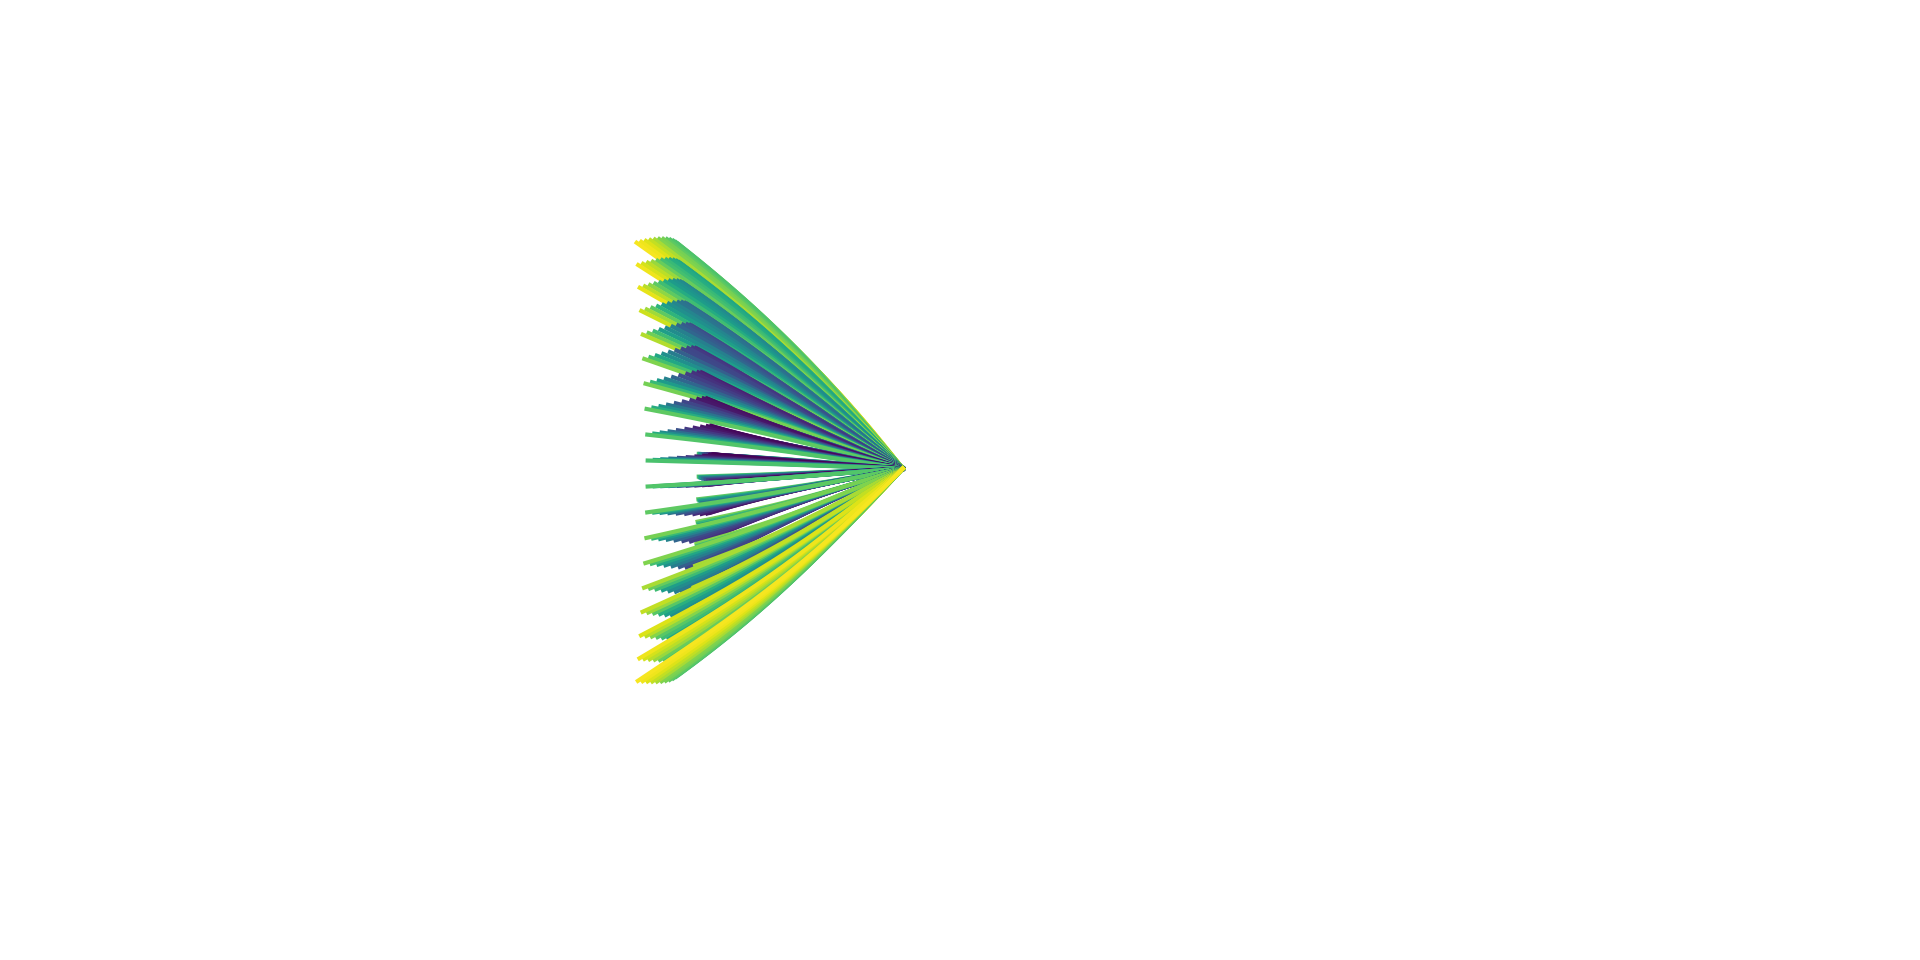

In [9]:
wg.fullplot(Motion1[::10, 1], 21)

In [5]:
Par = [0.014/1.42953, 1, 0.9]
initial_q = np.array([6.25*Par[1]+Par[2], np.pi, np.pi/2])
print(Par, initial_q)
Grid_dimension = '2D'
mode = True
Motion2, Grid2, CM2 = w.Simulate_DNeg(Smpl.Sympl_DNeg, Par, 0.02, 10000, initial_q, 20**2, 20**2, Grid_dimension, mode, wg.Grid_constr_3D_Sph)

[0.00979342860940309, 1, 0.9] [7.15       3.14159265 1.57079633]



1279.4202871322632
Time spent:1165.3748095035553


In [6]:
Cosyst =  ' Sph '
cv2.imwrite(os.path.join(path, "Pictures/Image "+Grid_dimension+"Gr"+Cosyst+"DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], Grid2))

True

In [7]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"2DGr DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], wg.Grid_constr_2D(Motion2[-1, 1], 11, 1, 0.05)))

True

In [8]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], np.zeros(Motion2[-1, 1, 0].shape, dtype=bool)))

True

(97970692,) (1000, 400, 400)
(226780,) (1000, 19, 19)
True


<IPython.core.display.Javascript object>


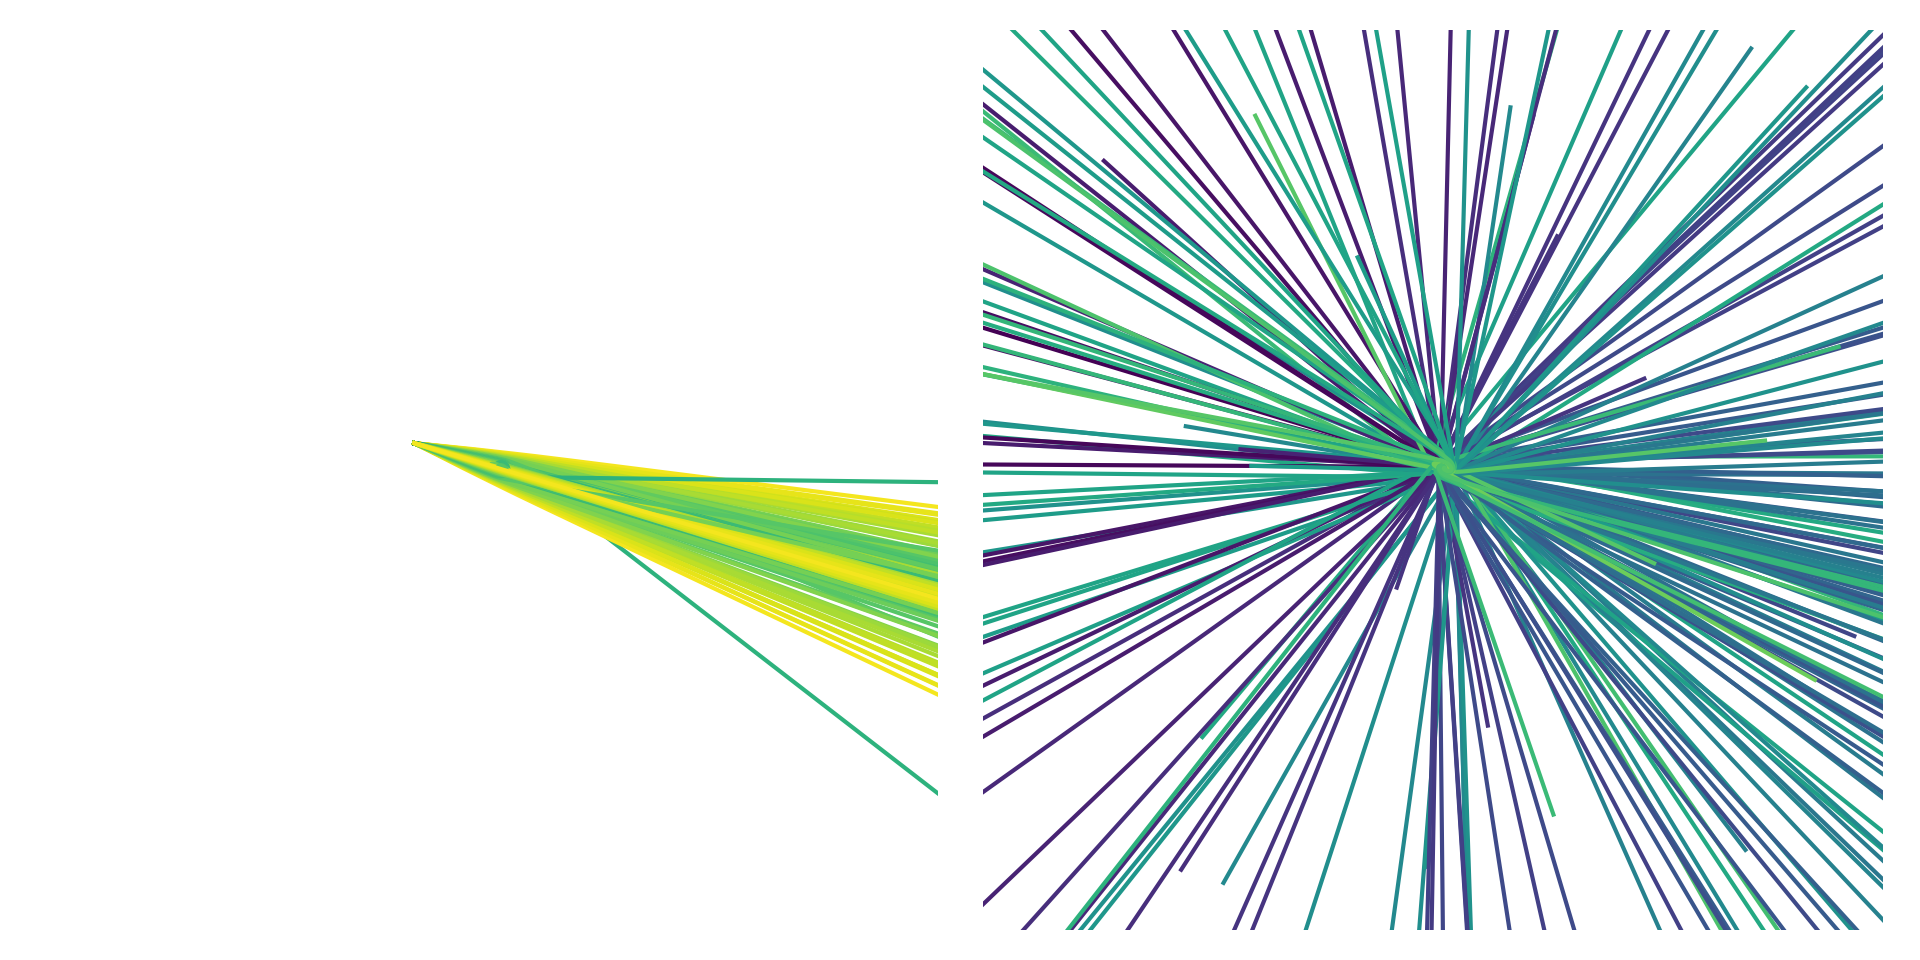

In [9]:
wg.fullplot(Motion2[:, 1], 21)

In [ ]:
Par = [0.014/1.42953, 1, 0.9]
initial_q = np.array([6.25*Par[1]+Par[2], np.pi, np.pi/2])
Motion3, CM3 = w.simulate_raytracer_fullpath(2000, Par, initial_q, 2, 20**2, 20**2, 'RK45', True)

In [ ]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg RK4"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion3[-1, 1], np.zeros(Motion3[-1, 1, 0].shape, dtype=bool)))

In [5]:
import WormholePics as wrmpics
#gar = 'four.png'
#sat = 'negfour.png'
gar = 'fourfull.png'
sat = 'negfourfull.png'
#Par = [0.8/1.42953, 8.6, 4.3] # M, rho, a parameters wormhole
Par = [0.056/1.42953, 1, 2.5]
initial_q = np.array([6.25*Par[1]+Par[2], np.pi, np.pi/2])

In [8]:
wormh, CM4= w.wormhole_with_symmetry(1000, initial_q, 400, 400, Par, 0.001, True, True)
picture = wrmpics.make_pic_quick(wormh, sat, gar)
np.save('picture', picture)
print('Saving picture')
path = os.getcwd()
cv2.imwrite(os.path.join(path, "Pictures/Image "+"Symm RK"+str(Par)+" "+str(initial_q)+".png"), picture)
print('Picture saved')

Initializing screen and calculating initial condition...
Integrating ray...



3.142888920476337
radius saved!
Average number of steps is: 40.91549295774648.
calculating constants of motion
Tijdsduur = 2.0849621295928955
Rotating ray...



Ray rotated!
Reading in pictures...
Pictures ready!
Making wormhole...



Wormhole ready!
Saving picture
Picture saved


In [6]:
wormh, CM5 = w.wormhole_with_symmetry(200, initial_q, 400, 400, Par, 0.01, False, True)
print('Saving picture')
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg Symm Sympl"+str(Par)+" "+str(initial_q)+".png"),
            wrmpics.make_pic_quick(wormh, sat, gar))


19.715937852859497
Time spent:19.340281009674072
Tijdsduur = 20.47095799446106
Rotating ray...



Ray rotated!
Saving picture
Reading in pictures...
Pictures ready!
Making wormhole...



Wormhole ready!


True

In [9]:
def simulate_raytracer_fullpath(t_end, Par, q0, N, Nz = 14**2, Ny = 14**2, methode = 'BDF'):
    """
    Solves the differential equations using a build in solver (solve_ivp) with
    specified method.
    Input:  - t_end: endtime of the Integration
            - Par: wormhole parameters
            - q0: position of the camera
            - Nz: number of vertical pixels
            - Ny: number of horizontal pixels
            - methode: method used for solving the ivp (standerd runge-kutta of fourth order)

    Output: - Motion: Usual 5D matrix
    """
    print('Initializing screen and calculating initial condition...')

    # end = int(np.ceil(np.sqrt(Ny**2+Nz**2)))
    M, rho, a = Par

    # Reading out values and determining parameters
    S_c = w.screen_cart(Nz, Ny, 1, 1)
    S_cT = np.transpose(S_c, (2,0,1))
    S_sph = w.cart_Sph(S_cT)
    p, Cst = w.inn_momenta(S_c, S_sph, w.Cst_DNeg, w.inn_mom_DNeg, Par)
    p1, p2, p3 = p
    q1, q2, q3 = q0
    Motion = np.empty((Nz,Ny,6,N))

    # Looping over all momenta
    for j in range(0, len(p1)):
        start_it = time.time()
        for i in range(0, len(p1[0])):
            start_it = time.time()
            initial_values = np.array([q1, q2, q3, p1[j][i], p2[j][i], p3[j][i], M, rho, a, Cst[0,i,j], Cst[1,i,j]])
            # Integrates to the solution
            Motion[j,i] = integr.solve_ivp(w.diff_equations, [t_end, 0], initial_values, method = methode, t_eval=np.linspace(t_end, 0, N)).y[:6]

        end_it = time.time()
        duration = end_it - start_it
        print('Iteration ' + str((j, i)) + ' completed in ' + str(duration) + 's.')
    Motion[:,:,1] = np.mod(Motion[:,:,1], 2*np.pi)
    Motion[:,:,2] = np.mod(Motion[:,:,2], np.pi)
    return np.transpose(np.array([Motion[:,:,0:3], Motion[:,:,3:]]), (4,0,3,1,2)) #output same shape as sympl. intgr.

In [6]:
Motion2 = w.simulate_raytracer_fullpath(500, Par, initial_q, 1000, 20**2, 20**2, 'BDF')

Initializing screen and calculating initial condition...
Iteration (0, 399) completed in 0.05005383491516113s.
Iteration (1, 399) completed in 0.05013680458068848s.
Iteration (2, 399) completed in 0.05089426040649414s.
Iteration (3, 399) completed in 0.04974794387817383s.
Iteration (4, 399) completed in 0.05145597457885742s.
Iteration (5, 399) completed in 0.049449920654296875s.
Iteration (6, 399) completed in 0.05002593994140625s.
Iteration (7, 399) completed in 0.04766225814819336s.
Iteration (8, 399) completed in 0.04801487922668457s.
Iteration (9, 399) completed in 0.04763913154602051s.
Iteration (10, 399) completed in 0.047299861907958984s.
Iteration (11, 399) completed in 0.0485079288482666s.
Iteration (12, 399) completed in 0.04879403114318848s.
Iteration (13, 399) completed in 0.04901909828186035s.
Iteration (14, 399) completed in 0.0463719367980957s.
Iteration (15, 399) completed in 0.04859018325805664s.
Iteration (16, 399) completed in 0.052822113037109375s.
Iteration (17, 39

Iteration (147, 399) completed in 0.04982781410217285s.
Iteration (148, 399) completed in 0.0533907413482666s.
Iteration (149, 399) completed in 0.04941201210021973s.
Iteration (150, 399) completed in 0.0479280948638916s.
Iteration (151, 399) completed in 0.04981184005737305s.
Iteration (152, 399) completed in 0.048975229263305664s.
Iteration (153, 399) completed in 0.049868106842041016s.
Iteration (154, 399) completed in 0.04943418502807617s.
Iteration (155, 399) completed in 0.052678823471069336s.
Iteration (156, 399) completed in 0.049250125885009766s.
Iteration (157, 399) completed in 0.053579092025756836s.
Iteration (158, 399) completed in 0.049352169036865234s.
Iteration (159, 399) completed in 0.0522611141204834s.
Iteration (160, 399) completed in 0.05339169502258301s.
Iteration (161, 399) completed in 0.04796409606933594s.
Iteration (162, 399) completed in 0.05048704147338867s.
Iteration (163, 399) completed in 0.04939913749694824s.
Iteration (164, 399) completed in 0.048710107

Iteration (293, 399) completed in 0.04688882827758789s.
Iteration (294, 399) completed in 0.04677700996398926s.
Iteration (295, 399) completed in 0.045845985412597656s.
Iteration (296, 399) completed in 0.04659605026245117s.
Iteration (297, 399) completed in 0.04490971565246582s.
Iteration (298, 399) completed in 0.04710197448730469s.
Iteration (299, 399) completed in 0.0506589412689209s.
Iteration (300, 399) completed in 0.049178123474121094s.
Iteration (301, 399) completed in 0.052210092544555664s.
Iteration (302, 399) completed in 0.04980182647705078s.
Iteration (303, 399) completed in 0.06190896034240723s.
Iteration (304, 399) completed in 0.05109071731567383s.
Iteration (305, 399) completed in 0.05023908615112305s.
Iteration (306, 399) completed in 0.047753095626831055s.
Iteration (307, 399) completed in 0.04789996147155762s.
Iteration (308, 399) completed in 0.04956388473510742s.
Iteration (309, 399) completed in 0.0502321720123291s.
Iteration (310, 399) completed in 0.0492060184

In [61]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"2DGr DNeg Scipy RK45"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], wg.Grid_constr_2D(Motion2[-1, 1], 11, 1, 0.05)))

True

In [7]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg scipy BDF"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], np.zeros(Motion2[-1, 1, 0].shape, dtype=bool)))

True

(24616748,) (1000, 400, 400)
(45234,) (1000, 18, 18)
True


<IPython.core.display.Javascript object>


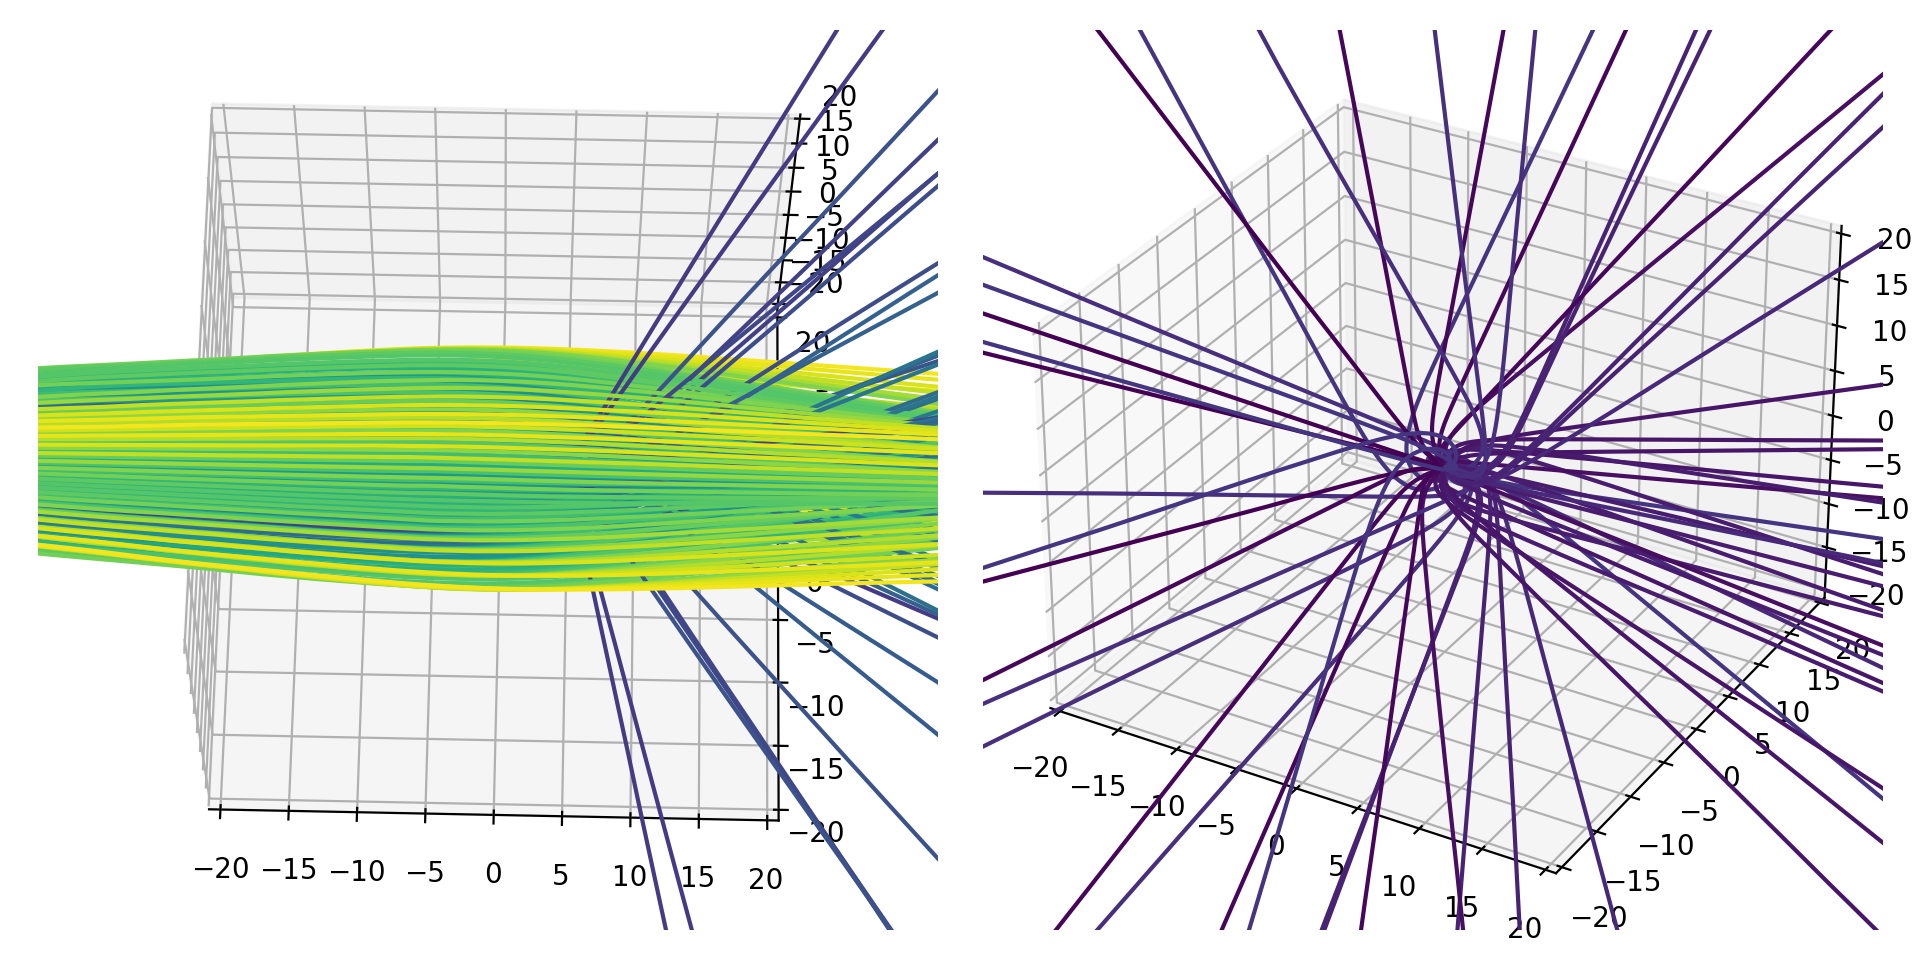

In [10]:
wg.fullplot(Motion2[:, 1], 23)

In [48]:
plt.cm.viridis(np.arange(5)/5)

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ]])

<IPython.core.display.Javascript object>


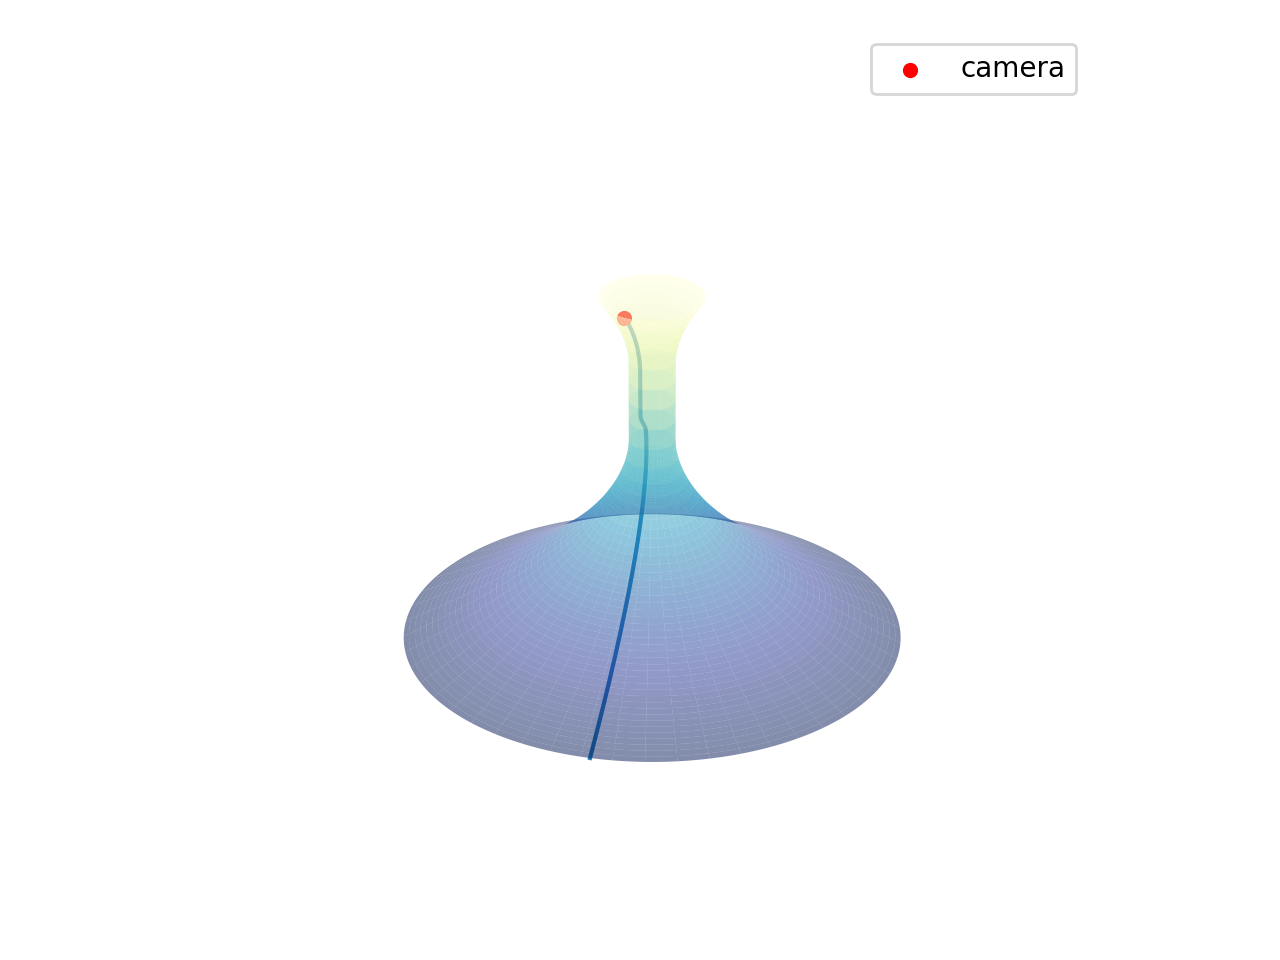

In [74]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
#Geo_Sel = [[20,25],[65,15],[71,58],[145,142]]
#Geo_Sel = [[68,200]] #noise symplectic [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
Geo_Sel = [[360, 199]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
gdsc(Motion2, Par, "Pictures/Noise "+Geo_txt+" DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path, Geo_label, Geo_Sel)

In [11]:
CM2 = np.array([w.DNeg_CM(Motion2[k,0], Motion2[k,1], Par) for k in range(len(Motion2))])

In [230]:
def ray_spread(Nz, Ny):
    # input: Ny: amount of horizontal arrays, Nz: amount of vertical arrays
    # output: cl: color based on deviation of the norm of a ray compared to direction obeserver is facing
            #ind ind of original ray mapped to colormap
    S_c = w.screen_cart(Nz, Ny, 1, 1)
    S_cT = np.transpose(S_c, (2,0,1))
    n = np.linalg.norm(S_cT, axis=0)
    n_u, ind = np. unique(n, return_inverse=True)
    N = n_u.size
    cl = plt.cm.viridis(np.arange(N)/N)

    return cl, ind

def plot_CM(CM, Label, name, path):
    #input: 3D array containing energy of each ray over time, advancement in time on first row
    #       Label: list of labels of constants
    #       name: picture/filename
    #       path: directory
    # plot the constants of motion over the partition of the rays
    
    x = np.arange(len(CM))
    if len(Label) > 1:
        Sh = CM[0,0].shape
    else:
        Sh = CM[0].shape 
    if len(Sh) > 1:
        Ny, Nz = Sh
        cl, ind = ray_spread(Nz, Ny)
        if len(Label) > 1:
            CM = np.transpose(CM, (1,0,2,3))
    else:
        N = Sh[0]
        cl = plt.cm.viridis(np.arange(N)/N)
        if len(Label) > 1:
            CM = np.transpose(CM, (1,0,2))
    if len(Label) > 1:
        N_C = len(CM)
        fig, ax = plt.subplots(1, N_C)
        for k in range(N_C):
            if len(Sh) > 1:
                for i in range(Nz):
                    for j in range(Ny):
                        ij = i + Nz*j
                        cl_i =cl[ind[ij]]
                        ax[k].plot(x, CM[k,:,i,j], color=cl_i)
            else:
                for i in range(N):
                        x[k].plot(x, CM[k,:,i], color=cl[i])        
            ax[k].set_yscale("symlog")
            # ax[k].set_title(Label[k] + ",  Donker pixels binnenkant scherm, lichte pixels buitenkant")
                
            ax[k].set_ylabel(Label[k])
            if k == 1:
                ax[k].set_xlabel("\npercentage of path finished [%]")
            else:
                ax[k].set_xlabel("percentage of path finished [%]")
            ax[k].set_title("sum subdivision rays")
    else:
        fig, ax = plt.subplots()
        if len(Sh) > 1:
            for i in range(Nz):
                for j in range(Ny):
                    ij = i + Nz*j
                    cl_i =cl[ind[ij]]
                    ax.plot(x, CM[:,i,j], color=cl_i)
        else:
            for i in range(N):
                ax.plot(x, CM[:,i], color=cl[i])        
        ax.set_yscale("symlog")
        # ax[k].set_title(Label[k] + ",  Donker pixels binnenkant scherm, lichte pixels buitenkant")
                
        ax.set_ylabel(Label[0])
        ax.set_xlabel("percentage of path finished [%]")
        ax.set_title("sum subdivision rays")
            
    plt.tight_layout()
    plt.savefig(os.path.join(path, name), dpi=150)
    plt.show()

<IPython.core.display.Javascript object>


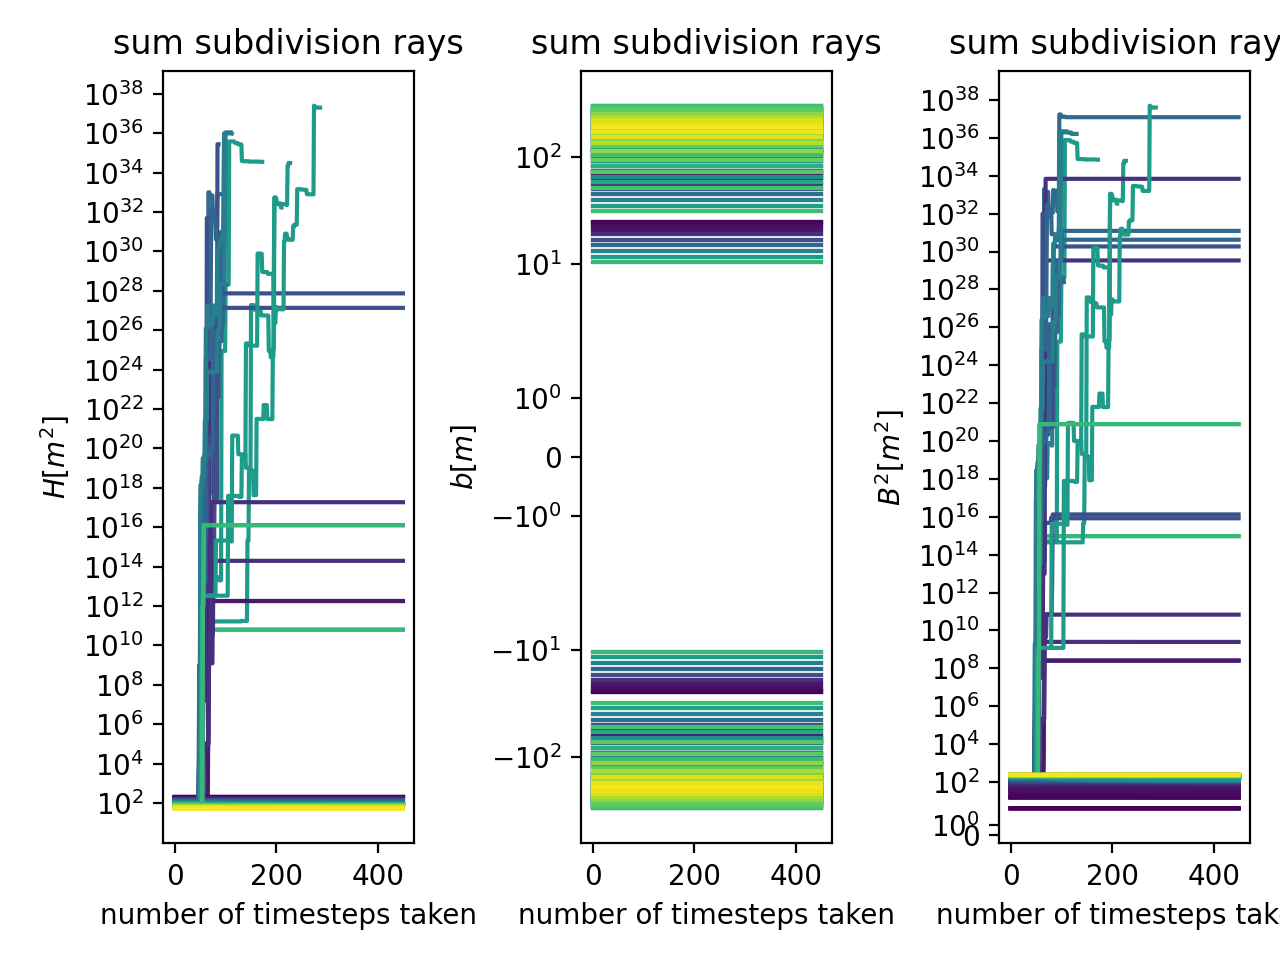

In [16]:
wg.plot_CM(CM1[::10,:], ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg Sympl"+str(Par)+" "+str(initial_q)+".png", path)

In [227]:
len(['$H$[$m^{2}$]'])

1

<IPython.core.display.Javascript object>


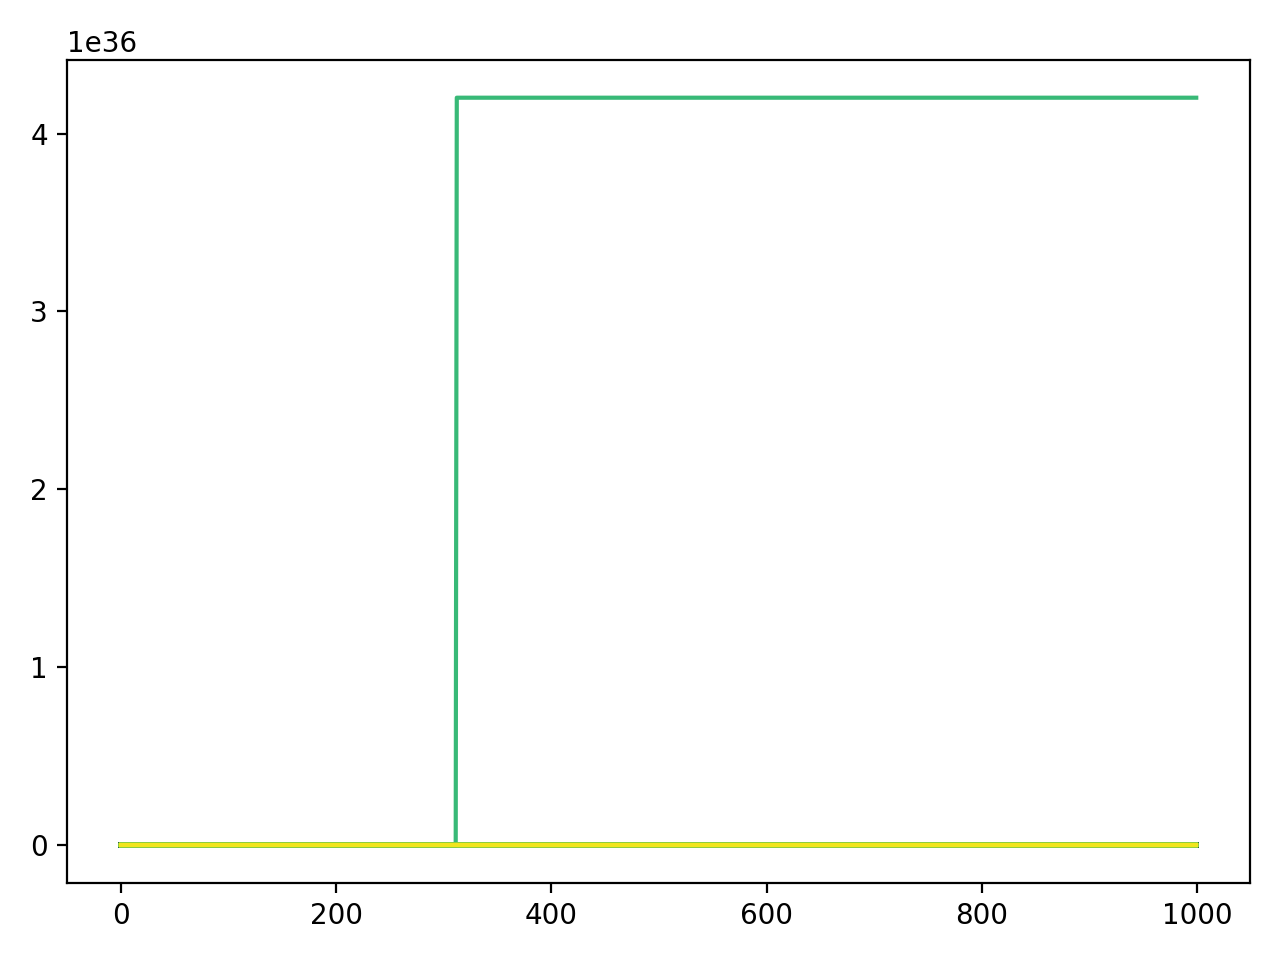

In [231]:
plot_CM(CM2[:,0], ['$H$[$m^{2}$]'], "Pictures/H DNeg BDF"+str(Par)+" "+str(initial_q)+".png", path)

<IPython.core.display.Javascript object>


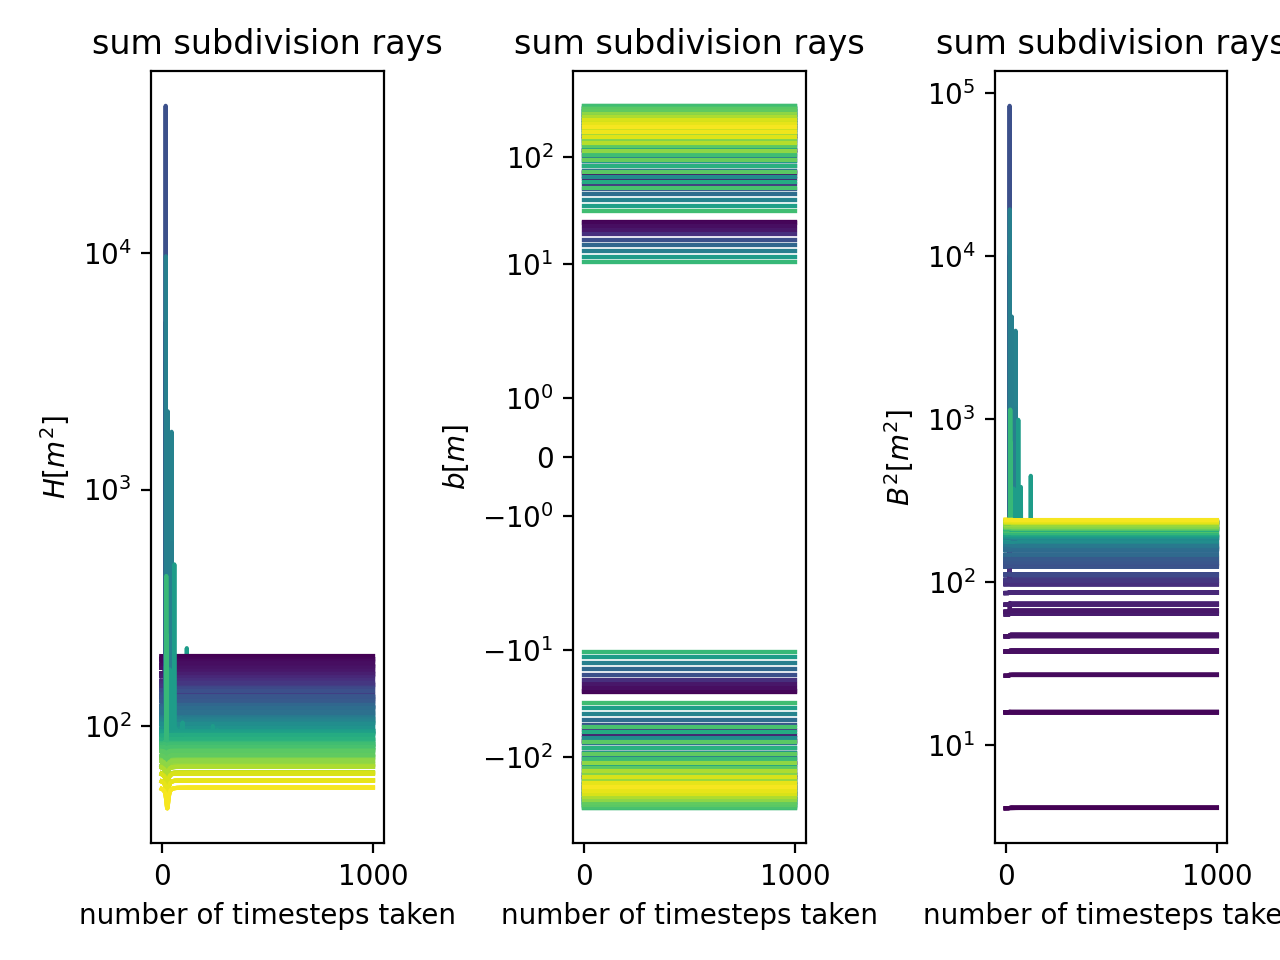

In [16]:
wg.plot_CM(CM3, ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path)

<IPython.core.display.Javascript object>


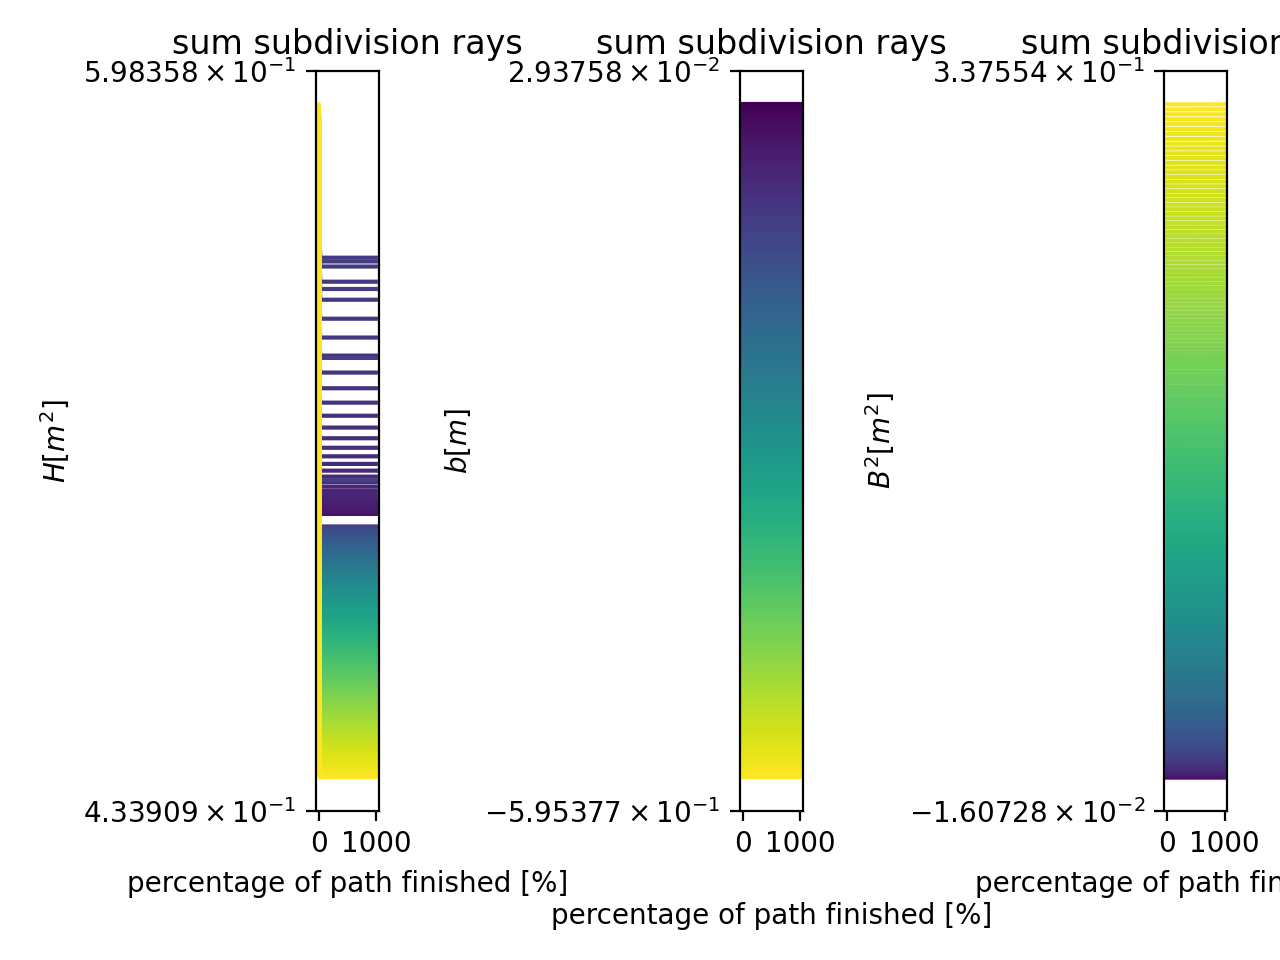

In [9]:
wg.plot_CM(CM4, ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg sympl symm"+str(Par)+" "+str(initial_q)+".png", path) 

<IPython.core.display.Javascript object>


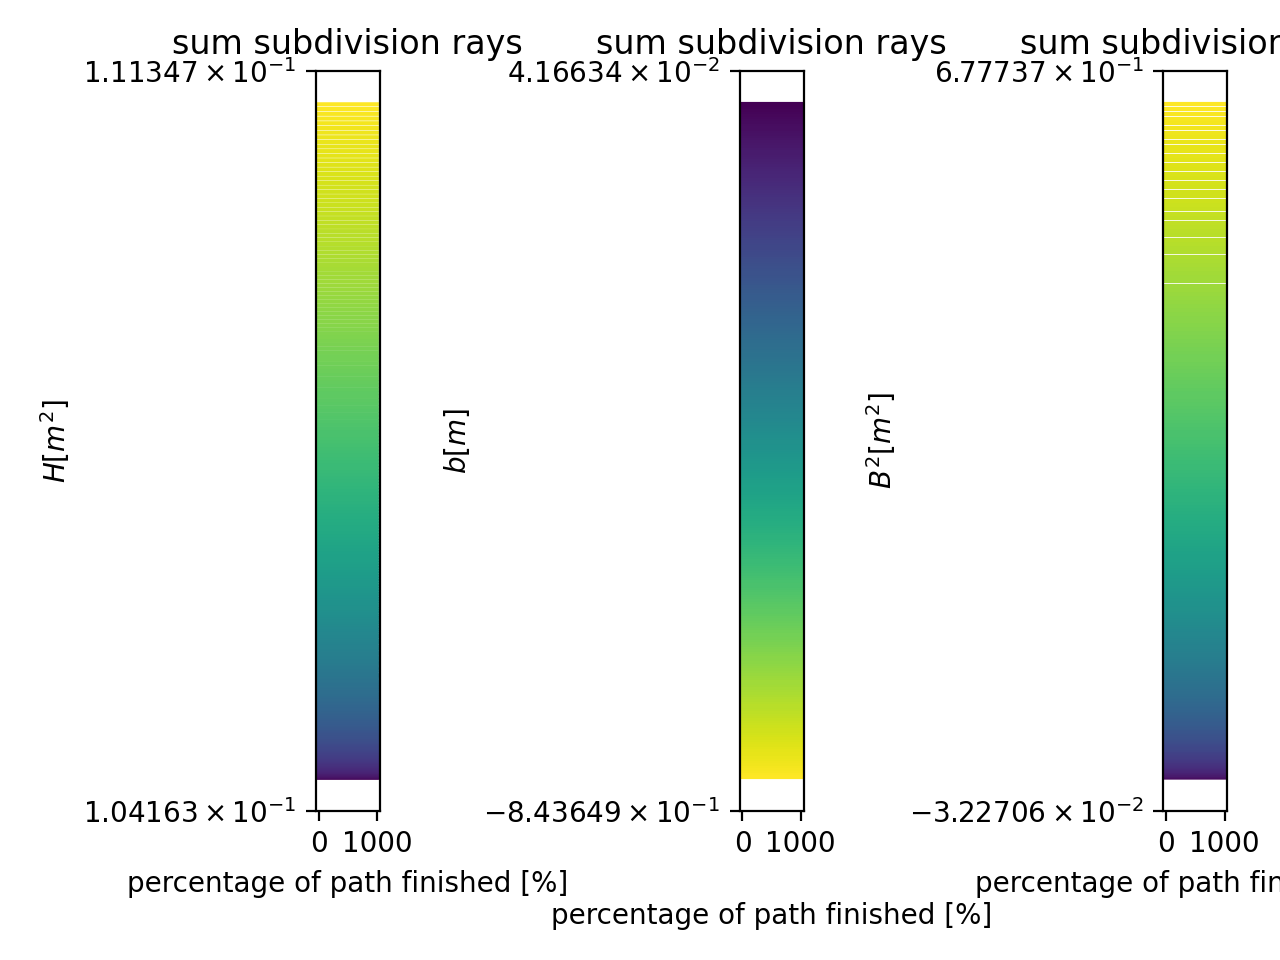

In [6]:
wg.plot_CM(CM5, ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg sympl symm"+str(Par)+" "+str(initial_q)+".png", path) 

In [220]:
def density_states_plot(pq_final, Par, H_max, n_bins, path, name):
    # input: pq_final: final position in phase space, pixels indices on last rows
    #       Par: parameters wormhole
    #       name: picture/filename
    #       path: directory
    # output: Density states plot
    
    p, q = pq_final.astype(np.float64)
    M, rho, a = Par

    p_l, p_phi, p_th = p
    l, phi, theta = q

    # defining r(l):
    r = w.dneg_r(l, M, rho, a)

    rec_r = 1/r
    rec_r_2 = rec_r**2
    sin1 = np.sin(theta)
    sin2 = sin1**2
    rec_sin2 = 1/sin2

    # defining hamiltonian
    H1 = p_l**2
    H2 = p_th**2*rec_r_2
    H3 = p_phi**2*rec_sin2*rec_r_2

    H = 0.5*(H1 + H2 + H3).flatten()
    K = len(H)
    M = K - len(H[H>H_max])
    H = H[H<H_max]

    fig, ax = plt.subplots(tight_layout=True)
    
    logbins = np.geomspace(H.min(), H.max(), n_bins)
    N, bins, patches = ax.hist(H, bins=logbins)
    
    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()
    
    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = mcolors.Normalize(fracs.min(), fracs.max())
    
    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    
    ax.set_xscale("symlog")
    y_sc = ax.get_yticks()
    ax.set_yticklabels(y_sc/K)
    ax.set_ylabel('occupation level [%]')
    ax.set_xlabel('$H$[$m^{2}$]')
    plt.savefig(os.path.join(path, name), dpi=150)
    print(str(M)+ " out of "+ str(K) + " values shown")
    plt.show()

<IPython.core.display.Javascript object>


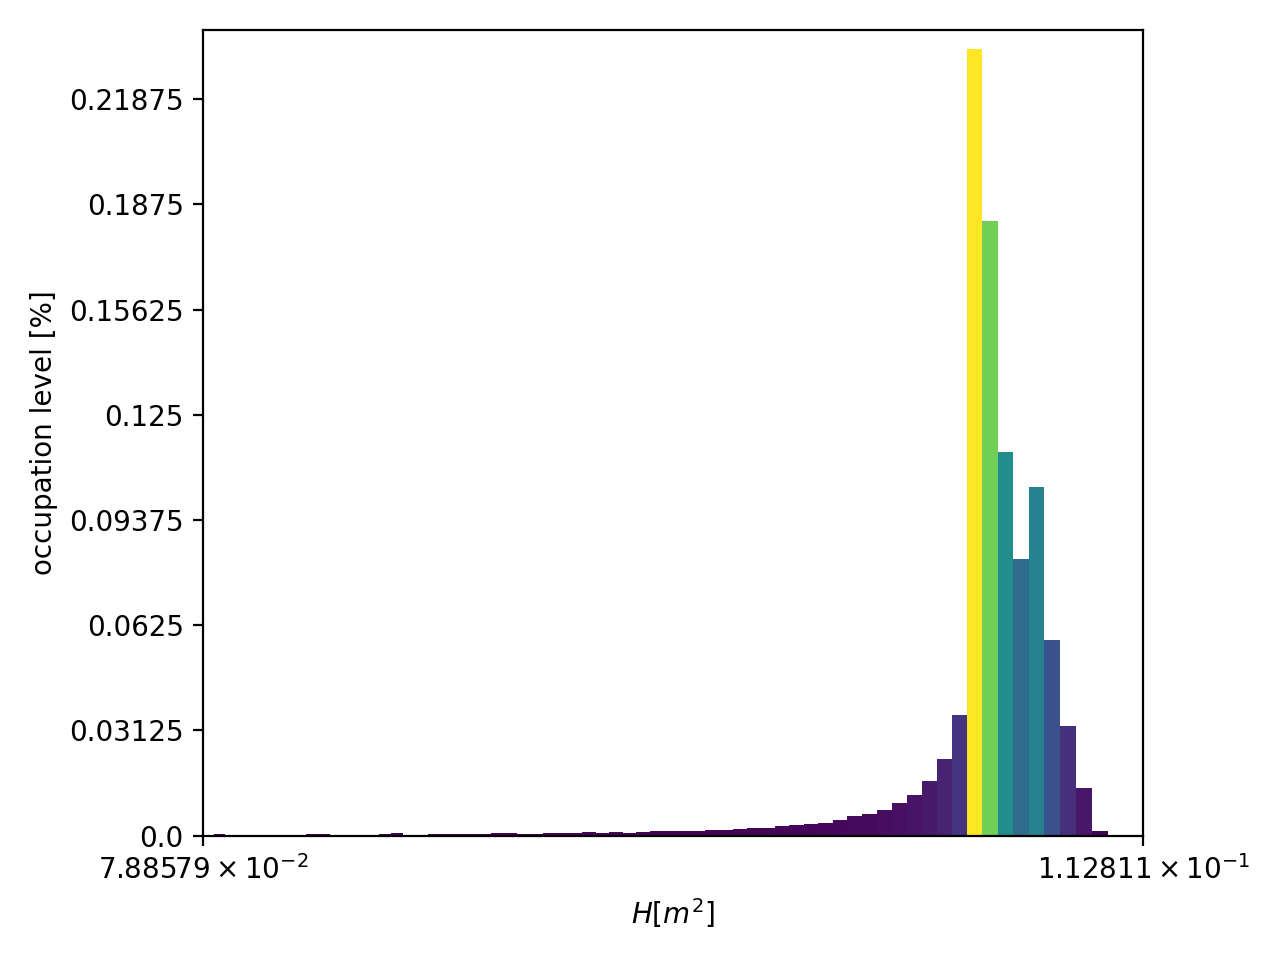

<ipython-input-220-89139897b624>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_sc/K)


159742 out of 160000 values shown


In [221]:
density_states_plot(Motion2[-1], Par, 0.12, 400, "Pictures/Dens. St. DNeg sympl"+str(Par)+" "+str(initial_q)+".png", path)

In [213]:
35000/400**2

0.21875

In [19]:
Motion2[-1,0,0].astype(np.float64)**2

array([[0.22228652, 0.22223217, 0.222178  , ..., 0.222178  , 0.22223217,
        0.22228652],
       [0.22224181, 0.22218752, 0.22213339, ..., 0.22213339, 0.22218752,
        0.22224181],
       [0.22219739, 0.22214314, 0.22208903, ..., 0.22208903, 0.22214314,
        0.22219739],
       ...,
       [0.22220343, 0.22214926, 0.22209524, ..., 0.22209524, 0.22214926,
        0.22220343],
       [0.22224785, 0.22219365, 0.2221396 , ..., 0.2221396 , 0.22219365,
        0.22224785],
       [0.22229253, 0.2222383 , 0.22218421, ..., 0.22218421, 0.2222383 ,
        0.22229253]])

In [ ]:
def gdsc(Motion, Par, name, path, geo_label = None, select = None, reduce = False):
    # input: Motion: 5D matrix, the elements being [p, q] with p, q as defined earlier
    #       Par: parameters wormhole
    #       Name: picture/filename
    #       Path: directory
    #       select: Give a list of 2D indices to plot only specific geodesiscs
    #       geo_label: if you're just plotting a list of geodesics (thus its elements in order time, [p,q], coordinate),
    #                   then give here a list of strings that which will be the label of your geodesics, corresponding to the order of your geodesics.
    #       reduce: if true sample geodescics uniformly
    M, rho, a = Par

    if np.any(select == None):
        if np.any(reduce == False):
            Sample = np.transpose(Motion, (1,2,3,0))
        else:
            Motion = np.transpose(Motion, (1,2,0,3,4))
            Ny, Nz =  Motion[0][0][0].shape
            Ny_s = int(np.sqrt(Nz))
            Nz_s = int(np.sqrt(Ny))

            # Samples a uniform portion of the rays for visualisation
            Sample = Motion[:, :, :, 1::Nz_s, 1::Ny_s]
            cl, ind = ray_spread(Nz_s, Ny_s)

    else:
        Motion = np.transpose(Motion, (3,4,0,1,2))
        Sample = np.transpose(
            [Motion[tuple(select[k])] for k in range(len(select))]
            , (2,3,1,0))

    p, q = Sample
    p_l, p_phi, p_th = p
    l, phi, theta = q
    # caluclates coordinates in inbedded space
    ax = plt.figure().add_subplot(projection='3d')
    r = w.dneg_r(l, M, rho, a)
    X, Y = r*np.cos(phi), r*np.sin(phi)
    
    S_l = np.linspace(np.max(l), np.min(l), len(l))
    Col_l = np.concatenate((l.T, np.expand_dims(S_l, axis=0)), axis=0).T
    Col_Z = Dia.imb_f_int(Col_l, Par)
    Z = Col_Z[:,:-1]
    S_Z0 = Col_Z[:,-1] + np.max(Z)

    if np.any(reduce == False):
        for k in range(len(Sample[0,0,0])):
            if np.any(geo_label == None):
                gl = str(select[k])
            else:
                gl = geo_label[k]
            ax.plot(X[:,k], Y[:,k], Z[:,k], label = gl )
        ax.scatter(X[0,0] , Y[0,0], Z[0,0], label='camera', c = 'r')
        #ax.set_title("Path of a geodesic that lead to noise")
        ax.legend()
    else:
        for i in range(Nz_s):
            for j in range(Ny_s):
                ij = i + Nz_s*j
                cl_i =cl[ind[ij]]
                ax.plot(X[:,i,j], Y[:,i,j], Z[:,i,j], color = cl_i, alpha=0.5)
        ax.scatter(X[0,0,0] , Y[0,0,0], Z[0,0,0], label='camera', c = 'r')
        ax.set_title("Geodesics")
        ax.legend()

    # adds surface

    #S_l = np.linspace(np.max(l), np.min(l), len(l))
    S_phi = np.linspace(0, 2*np.pi, len(l))
    S_R, S_PHI = np.meshgrid(w.dneg_r(S_l, M, rho, a), S_phi) # radius is r(l)

    # tile because symmetric for rotations, undependant on phi
    # Integral for Z direction like defined in the paper
    S_Z = np.tile(S_Z0, (len(l), 1)) #z(l)
    
    S_X, S_Y = S_R*np.cos(S_PHI), S_R*np.sin(S_PHI)
    #print(S_X.shape, S_Y.shape, S_Z.shape)
    ax.plot_surface(S_X, S_Y, S_Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.tight_layout()
    # Hide grid lines
    ax.grid(False)

    #ax.axis("off")
    ax.set_zlim([-5,1])
    plt.savefig(os.path.join(path, name), dpi=150)
    plt.show()

In [ ]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
#Geo_Sel = [[20,25],[65,15],[71,58],[145,142]]
Geo_Sel = [[92,198]] #noise symplectic [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
#Geo_Sel = [[360, 199]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
gdsc(Motion2, Par, "Pictures/Noise "+Geo_txt+" DNeg Sympl"+str(Par)+" "+str(initial_q)+".png",
        path, Geo_label, Geo_Sel)

<IPython.core.display.Javascript object>


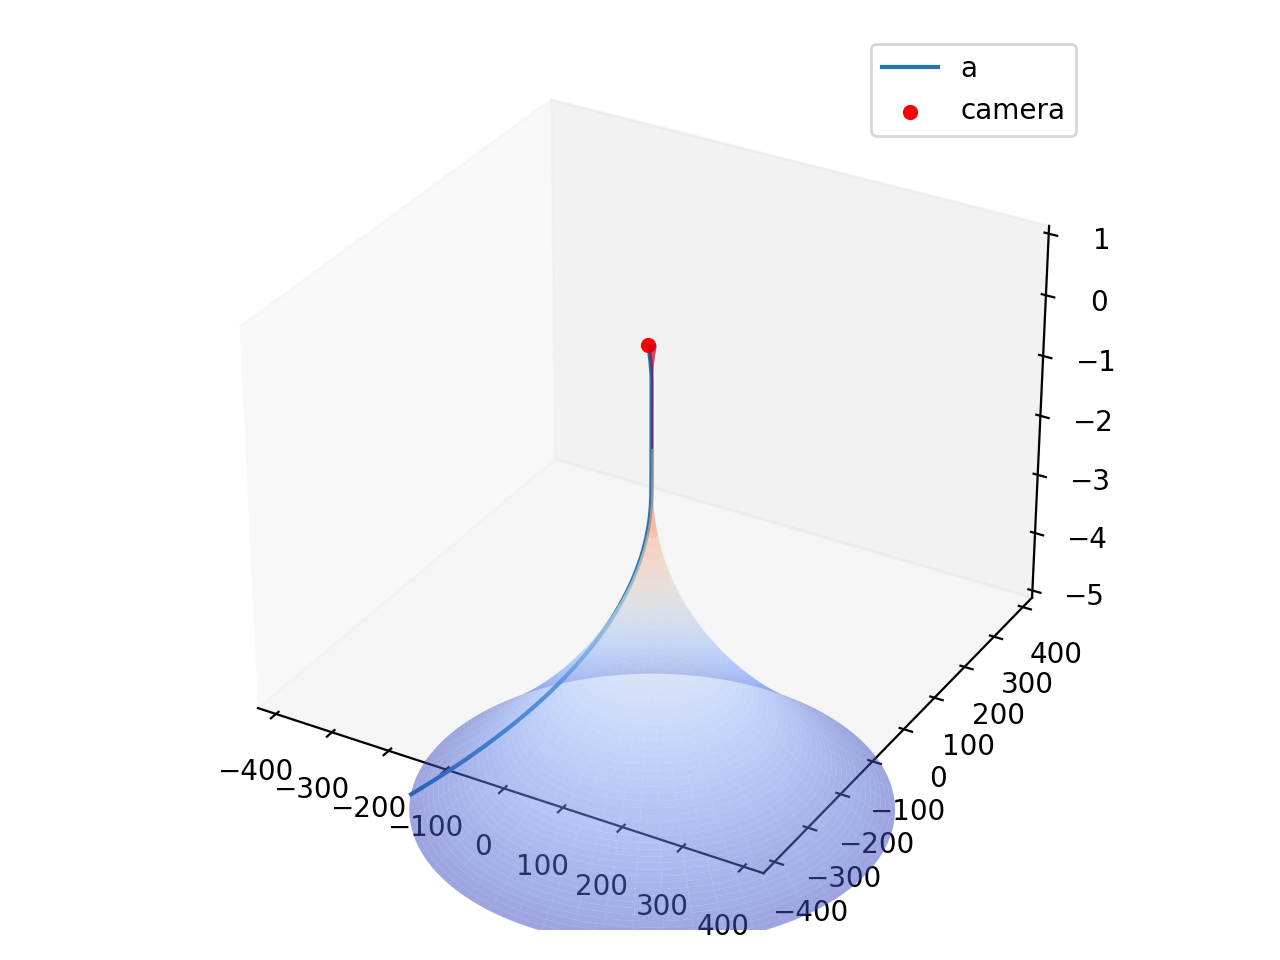

In [133]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
#Geo_Sel = [[4,4],[36,11],[71,58],[145,142]]
Geo_Sel = [[92,198]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
gdsc(Motion3, Par, "Pictures/Noise "+Geo_txt+" DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path, Geo_label, Geo_Sel)

<IPython.core.display.Javascript object>


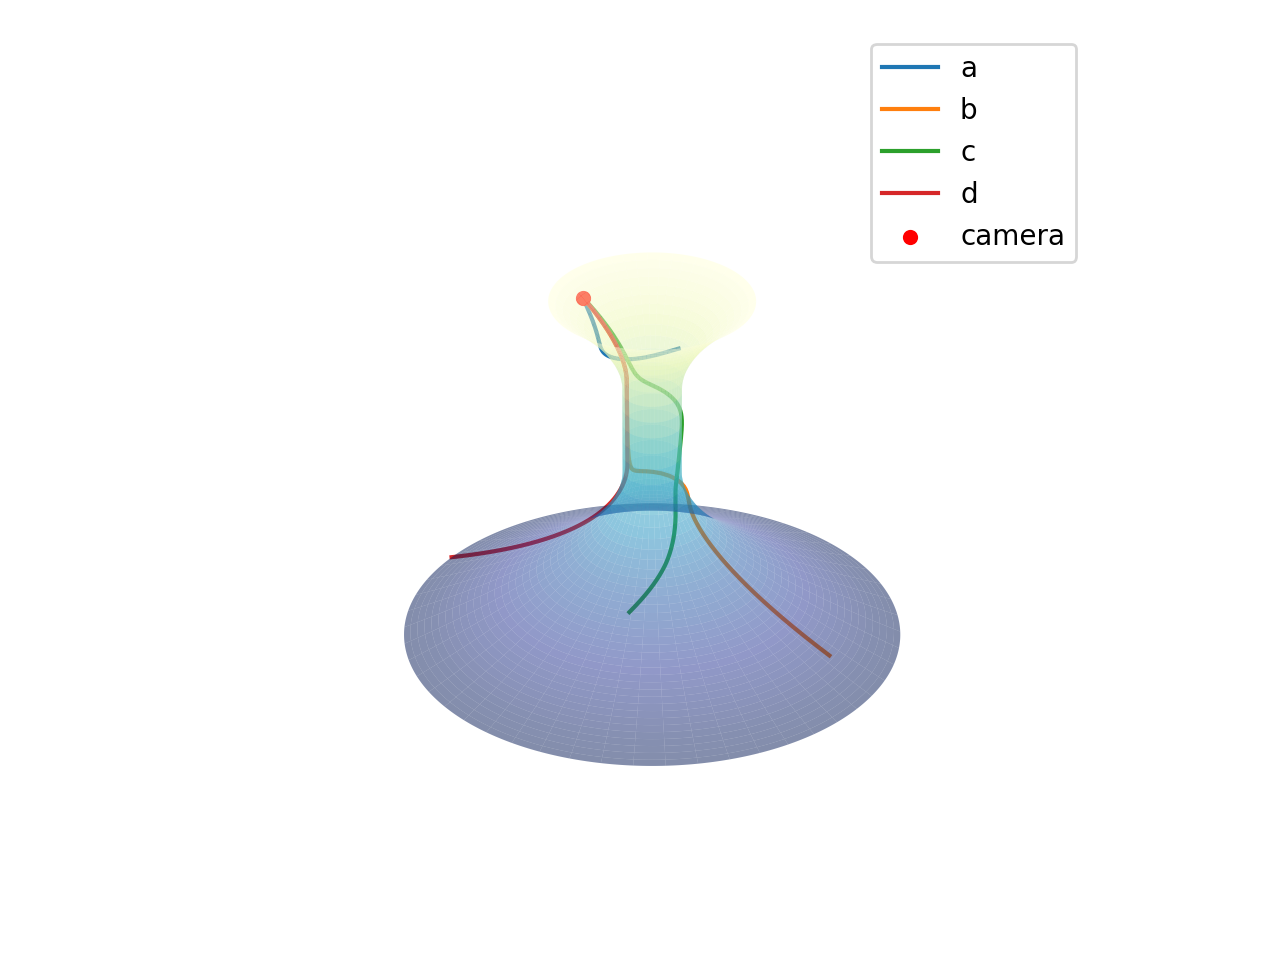

In [30]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
Geo_Sel = [[4,4],[36,50],[71,58], [50,50]]
#Geo_Sel = [[68,200]] #noise symplectic [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
#Geo_Sel = [[360, 199]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
wg.gdsc(Motion2, Par, "Pictures/geodesics "+Geo_txt+" DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path, Geo_label, Geo_Sel)

In [15]:
Motion2.shape

(500, 2, 3, 100, 100)

In [26]:
100/1000

0.1

In [24]:
np.mod(4000, 20)

0

In [27]:
joe = 0
for i in range(30):
    if np.mod(i, 100/1000) == 0:
        joe +=1
joe

1